## Effect of batch size notebook

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser

In [6]:
series = 18
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

excepted!


In [7]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 1.yaml
{   'cpu_request': ['16'],
    'data_type': 'image',
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_variants': ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x'],
    'node_name': 'yolo',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 18,
    'series_meta': 'checking the effect of batch on yolo, \\n cpu type: '
                   'Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1]},
    'workload_type': 'static'}


excepted!


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,1,1,16,0.384173,273.206875,0.269305
1,yolov5n,1,1,16,0.320744,739.198941,0.253044
2,yolov5n,2,1,16,0.629265,341.283871,0.516389
3,yolov5n,2,1,16,0.592151,959.875498,0.506639
4,yolov5n,4,1,16,1.089371,331.499155,0.967907
5,yolov5n,4,1,16,1.099305,933.283392,0.994901
6,yolov5n,8,1,16,2.328228,314.041983,1.892367
7,yolov5n,8,1,16,2.217978,900.931334,1.952468
8,yolov5n,16,1,16,4.700507,317.642103,3.775778
9,yolov5n,16,1,16,4.432947,914.669490,3.333412


Text(0, 0.5, 'Latency (seconds)')

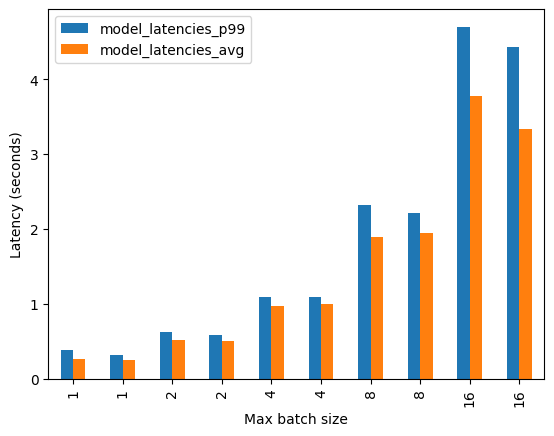

In [14]:
model_variant = 'yolov5n'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

excepted!


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5s,1,1,16,0.363097,278.809912,0.282918
1,yolov5s,1,1,16,0.385394,827.456236,0.271363
2,yolov5s,2,1,16,0.675946,341.594005,0.551017
3,yolov5s,2,1,16,0.682566,1021.408255,0.534222
4,yolov5s,4,1,16,1.298193,328.007813,1.085147
5,yolov5s,4,1,16,1.226926,987.307589,1.092708
6,yolov5s,8,1,16,2.452104,325.547841,2.154192
7,yolov5s,8,1,16,2.442140,976.116379,2.256185
8,yolov5s,16,1,16,5.363033,313.263525,4.128281
9,yolov5s,16,1,16,4.990072,967.903723,4.139450


Text(0, 0.5, 'Latency (seconds)')

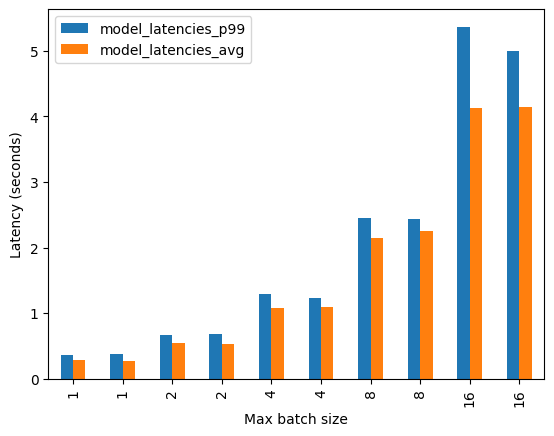

In [10]:
model_variant = 'yolov5s'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

excepted!


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5m,1,1,16,0.431566,305.781956,0.326799
1,yolov5m,1,1,16,0.401264,867.326119,0.315162
2,yolov5m,2,1,16,0.864661,361.665171,0.675611
3,yolov5m,2,1,16,0.876449,1101.856482,0.660914
4,yolov5m,4,1,16,1.506769,371.551929,1.325677
5,yolov5m,4,1,16,1.434146,1070.280717,1.281473
6,yolov5m,8,1,16,3.098370,385.534315,2.576394
7,yolov5m,8,1,16,2.944120,1076.054597,2.647318
8,yolov5m,16,1,16,6.006917,349.899149,4.378966
9,yolov5m,16,1,16,6.087158,1081.553614,4.314228


Text(0, 0.5, 'Latency (seconds)')

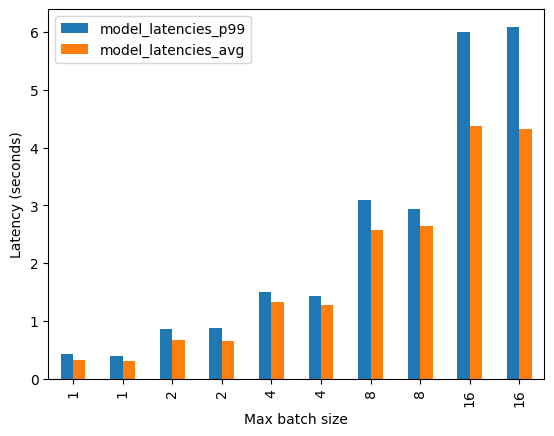

In [15]:
model_variant = 'yolov5m'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

excepted!


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5l,1,1,16,0.667093,378.939437,0.457341
1,yolov5l,1,1,16,0.537603,1078.173404,0.446744
2,yolov5l,2,1,16,1.087198,446.960626,0.903754
3,yolov5l,2,1,16,1.028818,1264.935776,0.911657
4,yolov5l,4,1,16,2.164690,454.460200,1.769568
5,yolov5l,4,1,16,2.020547,1246.962630,1.766166
6,yolov5l,8,1,16,4.476599,433.848822,3.751661
7,yolov5l,8,1,16,3.809532,1251.732401,3.085785
8,yolov5l,16,1,16,8.685708,425.810089,4.636634
9,yolov5l,16,1,16,8.214730,1275.497014,6.444698


Text(0, 0.5, 'Latency (seconds)')

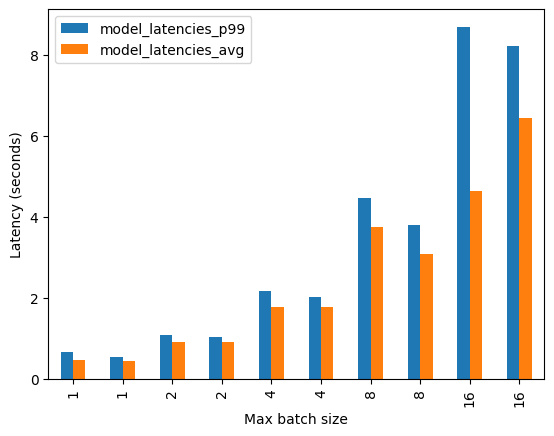

In [16]:
model_variant = 'yolov5l'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

excepted!


,model_variant,max_batch_size,load,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5x,1,1,16,0.856652,528.278674,0.648789
1,yolov5x,1,1,16,0.820368,1393.175354,0.609239
2,yolov5x,2,1,16,1.506681,564.351007,1.217947
3,yolov5x,2,1,16,1.370722,1528.573482,1.203182
4,yolov5x,4,1,16,2.731251,538.316268,2.519234
5,yolov5x,4,1,16,3.033185,1498.462754,2.334722
6,yolov5x,8,1,16,5.259395,519.399750,4.687390
7,yolov5x,8,1,16,5.471819,1495.694977,4.998468
8,yolov5x,16,1,16,11.496040,551.598132,8.545669
9,yolov5x,16,1,16,10.635495,1519.651966,7.041586


Text(0, 0.5, 'Latency (seconds)')

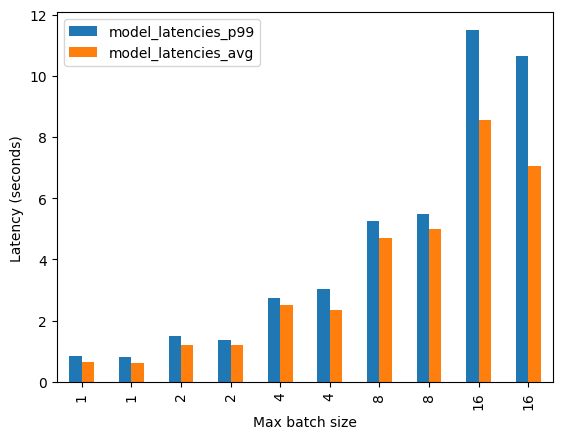

In [17]:
model_variant = 'yolov5x'
load = 1
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == model_variant) & (key_config_df['load']) == load]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'load', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")